In [1]:
pip install arch


In [2]:
pip install --upgrade pandas_datareader


In [3]:
import yfinance as yf
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from datetime import timedelta

In [4]:
# Define start and end dates
start = "2015-01-01"
end = "2020-06-10"


In [5]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [6]:
# Fetch data for AAPL stock using yfinance
aapl = yf.download('AAPL', start=start, end=end)


[*********************100%***********************]  1 of 1 completed


In [7]:
returns = 100 * aapl.Close.pct_change().dropna()

Text(0.5, 1.0, 'AAPL Returns')

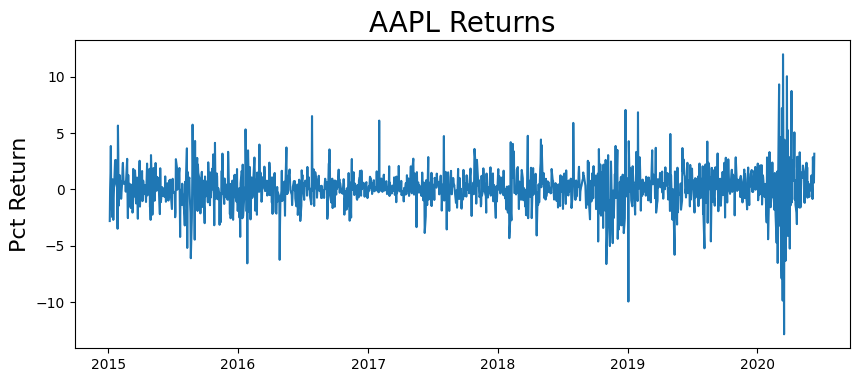

In [8]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('AAPL Returns', fontsize=20)

#the graph below shows the % change of disney stock between one day and prior

The graph you've shared shows the percentage return (labeled "Pct Return") of Apple's stock (AAPL) over time, spanning from 2015 to 2020.

Key Points
Y-Axis (Pct Return): This axis represents the daily percentage return on AAPL's stock price. Positive values indicate gains, while negative values represent losses.

X-Axis (Date): This shows the time period from 2015 to 2020. Each point on this axis corresponds to a specific trading day within this period.
Daily Fluctuations: The graph shows day-to-day variations in AAPL’s returns. Most fluctuations are within a relatively narrow band, but some spikes are more extreme.

High Volatility Periods: Toward the end of the graph (late 2019 to 2020), we observe an increase in the magnitude of the returns—both positive and negative. This period coincides with market turbulence, likely due to events like the COVID-19 pandemic in early 2020, which impacted global markets.
Observations

Consistent Returns: Most of the returns hover around 0%, indicating stable, moderate fluctuations.

Outliers: There are occasional spikes, both positive and negative, which indicate days of unusual market reaction. These could be due to earnings reports, news about the company, or broader market events.

Increased Volatility in 2020: The significant spikes in both directions in 2020 are characteristic of a high-volatility market environment, which aligns with the uncertainty in global markets during the COVID-19 pandemic.

Overall, this graph provides a visualization of the risk and volatility of holding AAPL stock over time, with noticeable increases in 2020.

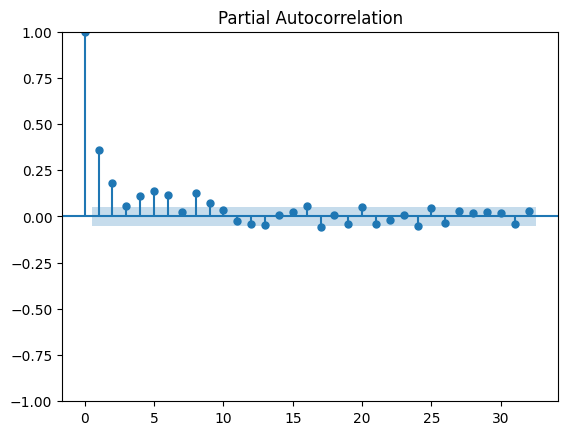

In [9]:
plot_pacf(returns**2)
plt.show()

Lag 1: The first spike at lag 1 is significant, indicating a strong direct relationship between the current value and the previous value. This suggests that the series might have some degree of autoregressive behavior.

Lag 2 and Beyond: The PACF values for lags 2 and beyond are within the confidence bands (the shaded area), meaning they are not statistically significant. This implies that the direct effect of lags beyond 1 on the current value is negligible, once the effect of lag 1 is accounted for.


In [10]:
model = arch_model(returns, p=3, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 736800331409.7485
Iteration:      2,   Func. Count:     22,   Neg. LLF: 804871731.288109
Iteration:      3,   Func. Count:     33,   Neg. LLF: 3196.306011612114
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2693.7151146724595
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2850.2891778005246
Iteration:      6,   Func. Count:     64,   Neg. LLF: 2553.931786109124
Iteration:      7,   Func. Count:     74,   Neg. LLF: 2574.973962495628
Iteration:      8,   Func. Count:     84,   Neg. LLF: 2546.399258457006
Iteration:      9,   Func. Count:     94,   Neg. LLF: 2543.0419033637927
Iteration:     10,   Func. Count:    104,   Neg. LLF: 2542.0236589508795
Iteration:     11,   Func. Count:    114,   Neg. LLF: 2541.76147312338
Iteration:     12,   Func. Count:    124,   Neg. LLF: 2541.6730339439155
Iteration:     13,   Func. Count:    133,   Neg. LLF: 2541.6651159631506
Iteration:     14,   Func. Count:    142,   Neg. LLF: 2541.6

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2541.66
Distribution:                  Normal   AIC:                           5099.33
Method:            Maximum Likelihood   BIC:                           5141.09
                                        No. Observations:                 1367
Date:                Wed, Nov 06 2024   Df Residuals:                     1366
Time:                        08:03:22   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1803  4.163e-02      4.331  1.484e-05 [9.872e-02,  0.262]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4375      0.188      2.327  1.998e-02  [6.898e-02,  0.806]
alpha[1]       0.1347  4.358e-02      3.090  2.003e-03  [4.924e-02,  0.220]
alpha[2]       0.0982  8.495e-02      1.156      0.248 [-6.827e-02,  0.265]
alpha[3]       0.0907  7.188e-02      1.262      0.207 [-5.019e-02,  0.232]
beta[1]    5.2135e-17      0.426  1.224e-16      1.000    [ -0.835,  0.835]
beta[2]        0.4509      0.199      2.270  2.321e-02  [6.156e-02,  0.840]
beta[3]        0.0822      0.304      0.270      0.787    [ -0.514,  0.679]
===========================================================================

Covariance estimator: robust
"""

In [11]:
model = arch_model(returns, p=3, q=0)

In [12]:
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 6221.866658418669
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5530.186755909461
Iteration:      3,   Func. Count:     25,   Neg. LLF: 4205.871914074799
Iteration:      4,   Func. Count:     32,   Neg. LLF: 95804.63601043881
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2944.8049922304904
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2656.8966772089184
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2619.2005727199285
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2585.6361924737002
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2585.586585701965
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2585.5842159364593
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2585.5841888487025
Iteration:     12,   Func. Count:     83,   Neg. LLF: 2585.58418884875
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2585.5841888487025
            Iterations

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2585.58
Distribution:                  Normal   AIC:                           5181.17
Method:            Maximum Likelihood   BIC:                           5207.27
                                        No. Observations:                 1367
Date:                Wed, Nov 06 2024   Df Residuals:                     1366
Time:                        08:03:22   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1410  4.569e-02      3.086  2.030e-03 [5.144e-02,  0.231]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.5269      0.225      6.780  1.199e-11   [  1.086,  1.968]
alpha[1]       0.1548  4.955e-02      3.124  1.786e-03 [5.767e-02,  0.252]
alpha[2]       0.1628  5.352e-02      3.042  2.351e-03 [5.790e-02,  0.268]
alpha[3]       0.1913  5.680e-02      3.368  7.582e-04 [7.995e-02,  0.303]
==========================================================================

Covariance estimator: robust
"""

In [13]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [14]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

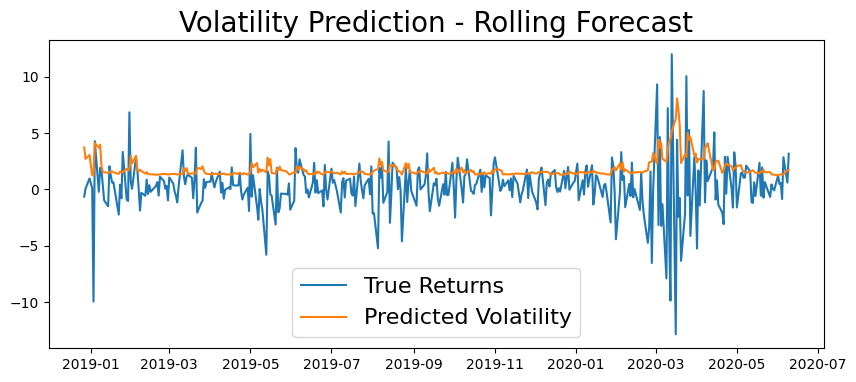

In [15]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

The graph shows a comparison between the actual returns of a financial asset (True Returns) and the predicted volatility of those returns over time. The blue line represents the actual returns, while the orange line represents the predicted volatility. We can see that the predicted volatility generally follows the trend of the actual returns, increasing when the returns are more volatile and decreasing when the returns are more stable. However, there are also instances where the predicted volatility does not accurately capture the actual volatility.

#MSFT

In [16]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [17]:
# Fetch data for AAPL stock using yfinance
msft = yf.download('MSFT', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [18]:
returns = 100 * msft.Close.pct_change().dropna()

Text(0.5, 1.0, 'MSFT Returns')

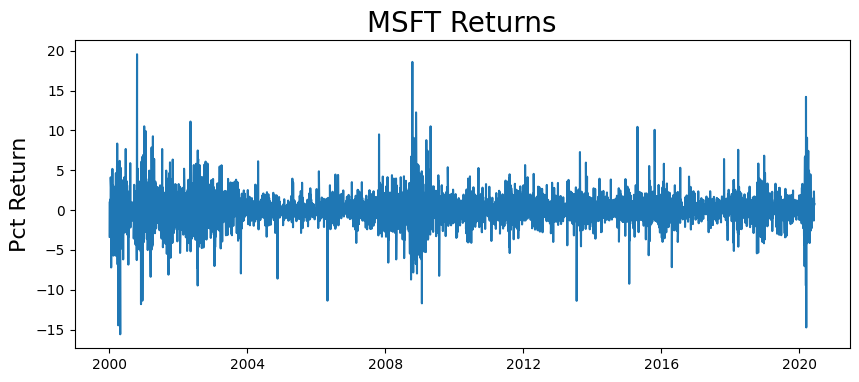

In [19]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('MSFT Returns', fontsize=20)

The graph shows the percentage returns of Microsoft (MSFT) stock over time. It appears to be a time series plot with the x-axis representing time (likely years) and the y-axis representing the percentage return. The plot shows fluctuations in the stock's returns over the years, with periods of positive and negative returns.










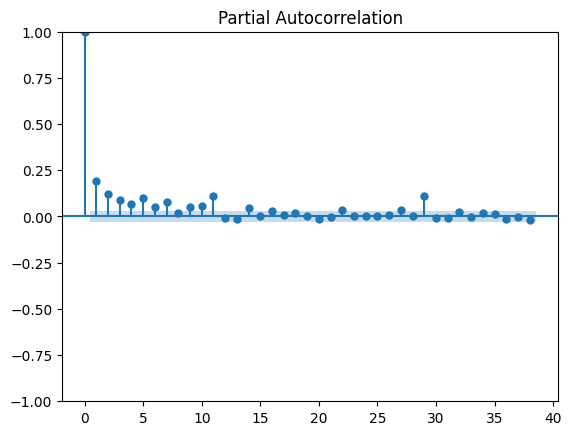

In [20]:
plot_pacf(returns**2)
plt.show()

The graph shows the Partial Autocorrelation Function (PACF) of a time series. The PACF measures the correlation between a time series and its lagged values, controlling for the effects of all intermediate lags. The significant spikes in the plot indicate the lags that have a significant direct impact on the current value.

Lag 1: The first spike at lag 1 is significant, indicating a strong direct relationship between the current value and the previous value.

Lag 2 and Beyond: The PACF values for lags 2 and beyond are within the confidence bands (the shaded area), meaning they are not statistically significant. This implies that the direct effect of lags beyond 1 on the current value is negligible, once the effect of lag 1 is accounted for.
Based on this interpretation, the most significant lag is 1.

In [21]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 29440.0801332744
Iteration:      2,   Func. Count:     19,   Neg. LLF: 18894013092.070816
Iteration:      3,   Func. Count:     29,   Neg. LLF: 11834.405109849327
Iteration:      4,   Func. Count:     38,   Neg. LLF: 11337.69363102912
Iteration:      5,   Func. Count:     47,   Neg. LLF: 10155.600773999618
Iteration:      6,   Func. Count:     56,   Neg. LLF: 9978.5859046343
Iteration:      7,   Func. Count:     64,   Neg. LLF: 9878.881657886948
Iteration:      8,   Func. Count:     72,   Neg. LLF: 9877.221833883192
Iteration:      9,   Func. Count:     79,   Neg. LLF: 9888.850075428998
Iteration:     10,   Func. Count:     88,   Neg. LLF: 9876.755830392269
Iteration:     11,   Func. Count:     95,   Neg. LLF: 9876.505008021535
Iteration:     12,   Func. Count:    102,   Neg. LLF: 9876.409682401707
Iteration:     13,   Func. Count:    109,   Neg. LLF: 9876.402559454633
Iteration:     14,   Func. Count:    116,   Neg. LLF: 9876.40056

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9876.40
Distribution:                  Normal   AIC:                           19764.8
Method:            Maximum Likelihood   BIC:                           19804.1
                                        No. Observations:                 5140
Date:                Wed, Nov 06 2024   Df Residuals:                     5139
Time:                        08:03:37   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0721  2.150e-02      3.353  7.996e-04 [2.995e-02,  0.114]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1755  6.634e-02      2.646  8.147e-03 [4.550e-02,  0.306]
alpha[1]       0.0891  2.781e-02      3.204  1.353e-03 [3.461e-02,  0.144]
alpha[2]       0.1046  4.537e-02      2.306  2.109e-02 [1.571e-02,  0.194]
beta[1]    7.2389e-17      0.246  2.939e-16      1.000   [ -0.483,  0.483]
beta[2]        0.7629      0.213      3.584  3.387e-04   [  0.346,  1.180]
==========================================================================

Covariance estimator: robust
"""

In [22]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [23]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

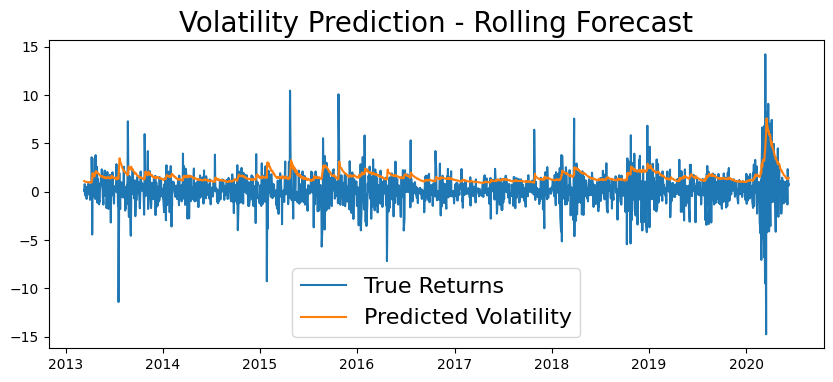

In [24]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

True Returns (Blue Line): This line fluctuates between approximately -15% and 15% on the y-axis, representing the actual percentage changes in the asset's value over the time period (2013 to 2020 on the x-axis).
Predicted Volatility (Orange Line): This line generally follows the trend of the True Returns line, but it's smoother and less volatile. It fluctuates between approximately 0 and 15 on the y-axis, representing the predicted volatility of the asset's returns.
Interpretation:

Periods of High Volatility: When the True Returns line shows significant fluctuations (e.g., sharp peaks or troughs), the Predicted Volatility line tends to increase, indicating that the model predicts higher volatility during these periods.
Periods of Low Vol
atility: When the True Returns line is relatively flat, the Predicted Volatility line tends to decrease, indicating that the model predicts lower volatility during these periods.

Overall, the graph suggests that the model is able to capture some of the volatility patterns in the asset's returns. However, there are instances where the predicted volatility doesn't perfectly align with the actual volatility, especially during periods of sudden and extreme price movements.

In [25]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [26]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

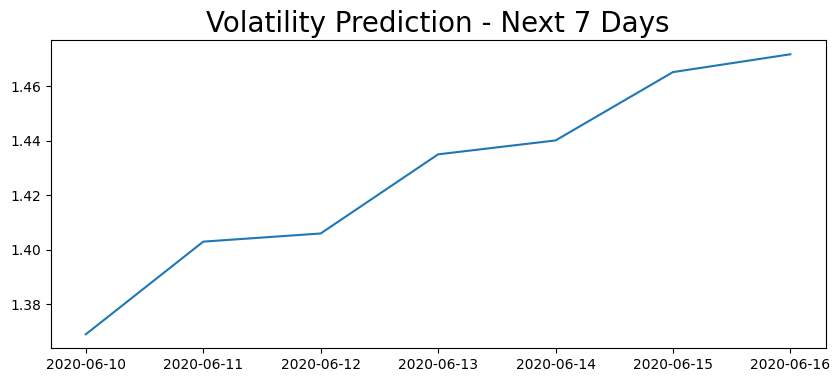

In [27]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

The graph titled "Volatility Prediction - Next 7 Days" shows a time series plot of predicted volatility for the next week, starting from June 10, 2020.

Here are the key observations:

X-axis: Represents the days from June 10th to June 16th, 2020.
Y-axis: Represents the predicted volatility level.
Trend: The predicted volatility is generally increasing over the 7-day period.

Interpretation:

The graph suggests that the model predicts an increasing trend in volatility for the next 7 days. The volatility level is expected to start at around 1.37 on June 10th and gradually increase to around 1.47 by June 16th.